In [69]:
pip install opencv-python  

Note: you may need to restart the kernel to use updated packages.


In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import cv2

img = cv2.imread('kohli.jpg')
img.shape

(767, 640, 3)

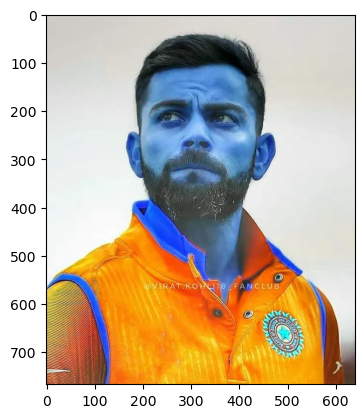

In [73]:
plt.imshow(img)

In [75]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(767, 640)

In [77]:
gray

array([[203, 203, 203, ..., 213, 213, 213],
       [203, 203, 203, ..., 213, 213, 213],
       [203, 203, 203, ..., 213, 213, 213],
       ...,
       [122, 125, 127, ...,  62,  62,  62],
       [ 62,  77,  99, ...,  63,  63,  63],
       [ 76,  66,  54, ...,  64,  64,  64]], dtype=uint8)

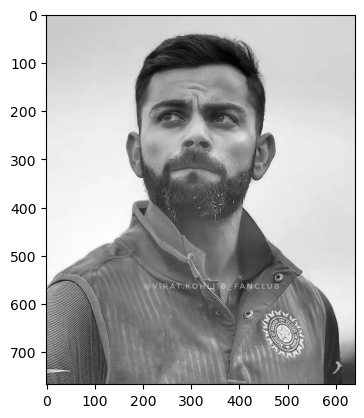

In [79]:
plt.imshow(gray,cmap = 'grey')

In [83]:
# now we are going to detect the face and the eyes for virat kohli
face_cascade = cv2.CascadeClassifier('py/DataScience/CelebrityFaceRecognition/model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('py/DataScience/CelebrityFaceRecognition/model/opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[156,  91, 307, 307]])

In [85]:
(x,y,w,h) = faces[0]  # because of a 2d array we must need to put [0]
x,y,w,h

(156, 91, 307, 307)

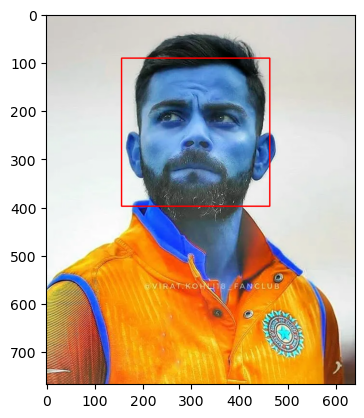

In [87]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

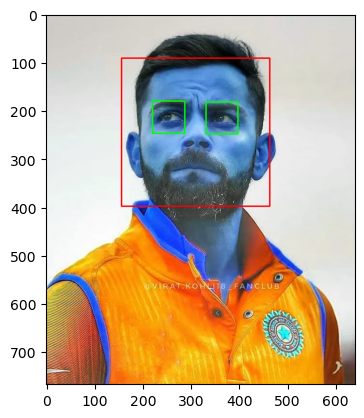

In [89]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img)
plt.show()

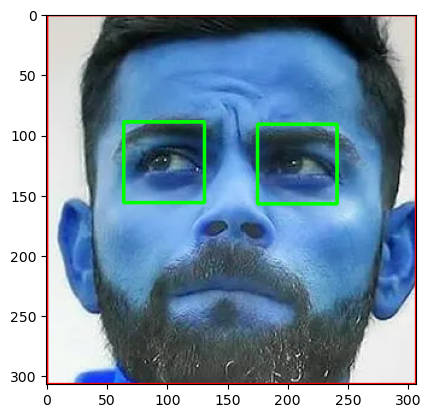

In [91]:
plt.imshow(roi_color,cmap = 'gray')

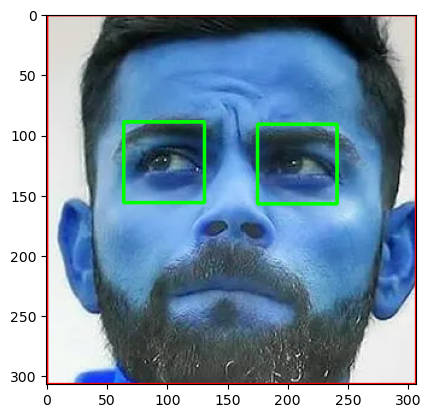

In [93]:
plt.imshow(roi_color)

In [95]:
# let's find the number of eyes for each of the image paths
def image_with_2eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color
    print("has less than 2 eyes")
    return None

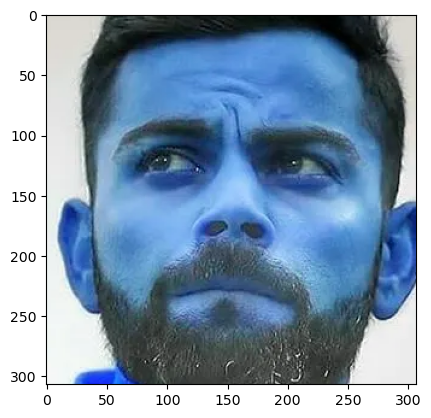

In [97]:
cropped_image = image_with_2eyes('kohli.jpg')
plt.imshow(cropped_image)  # returning image because it has 2 eyes or else it returns nothing

In [99]:
cropped_image2 = image_with_2eyes('kohli_side_pic.jpg')
cropped_image2  # returns nothing

has less than 2 eyes


In [101]:
def image_with_1face(image_path):
    img = cv2.imread(image_path)
    # plt.imshow(img)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    if(len(faces)==1):
        x,y,w,h = faces[0]
        roi_color = img[y:y+h,x:x+w]
        return roi_color
    elif len(faces)>1:
        print('has many people')
    else:
        print('has no detectable face')
    return None

In [103]:
cropped_image3 = image_with_1face('kohli_side_pic.jpg')
cropped_image3    # it has some exceptions

has no detectable face


In [105]:
cropped_image4 = image_with_1face('many_ppl.jpg')
cropped_image4

has many people


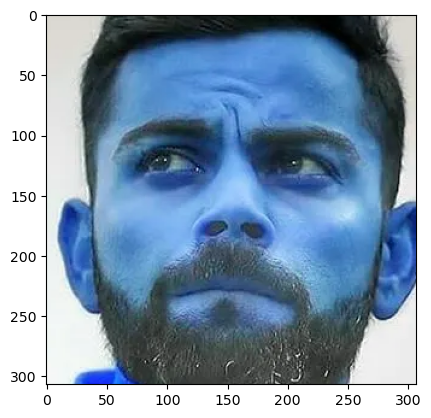

In [107]:
cropped_image5= image_with_1face('kohli.jpg')
plt.imshow(cropped_image5)


In [109]:
import os
from collections import defaultdict

files = defaultdict(list)
oldpath = 'py/DataScience/CelebrityFaceRecognition/images/'
newpath = 'refined_images/'   # we created this manually 
celeb = ['kohli','roger','messi','serena','maria']
def refine_images(oldpath):
    for person in celeb:
        cnt = 0
        old_folder = oldpath+person
        new_folder = newpath+person  # we are gonna create this through code
        os.makedirs(new_folder,exist_ok = True)  # we created our new folder
        for img in os.scandir(old_folder):
            proper_img = image_with_2eyes(img.path)
            if proper_img is None:   continue
                
            cnt+=1
            img_path = new_folder+'/'+person+str(cnt)+'.png'
            if os.path.exists(img_path): continue
            cv2.imwrite(img_path,proper_img)
            files[person].append(img_path)
        
        

In [111]:
refine_images(oldpath)  # these below lines of running the code are just for the indication of the removing images

has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than 2 eyes
has less than

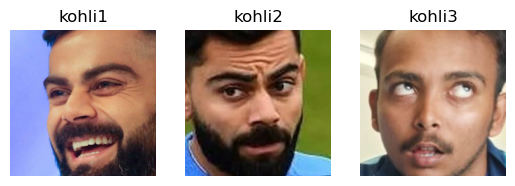

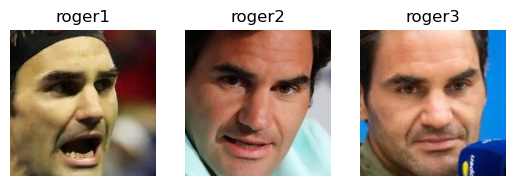

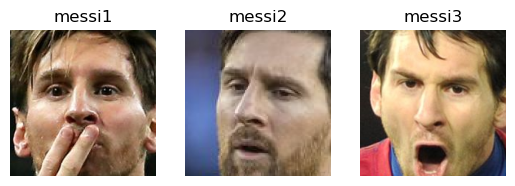

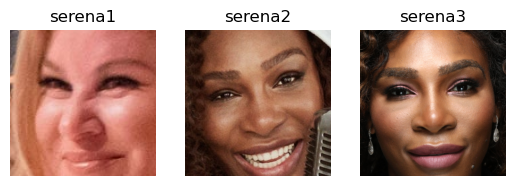

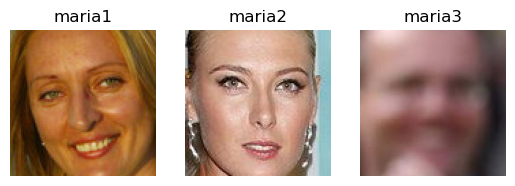

In [113]:
for person in files:
    for i in range(3):
        img_path = files[person][i]
        if(not os.path.exists(img_path)): continue
        img_path = files[person][i]
        img = cv2.imread(img_path)  
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        
        plt.subplot(1, 3, i+1)  
        plt.imshow(img)
        plt.title(f"{person}{i+1}")
        plt.axis("off")

    plt.show()
        


In [122]:
for person in files:
    print(len(files[person]))

48
30
39
35
35


In [124]:
# but in these folders we may observe some different people may appear so we need to delete them manually
# that is completed just now

for person in files:
    l = files[person].copy()
    ll = files[person]
    for path in l:
        if not os.path.exists(path): ll.remove(path)

In [126]:
for person in files:
    print(len(files[person]))

41
28
35
26
30


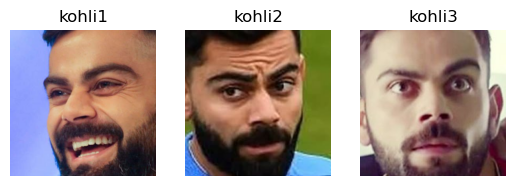

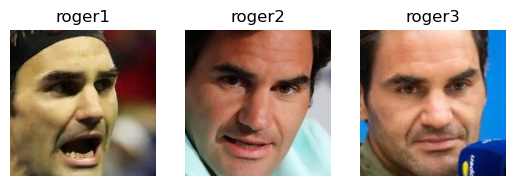

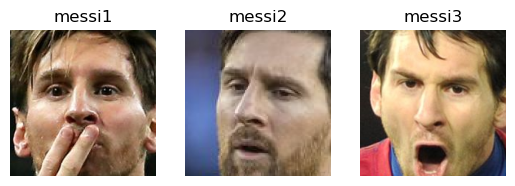

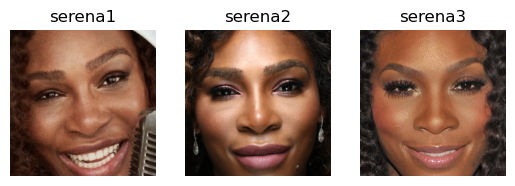

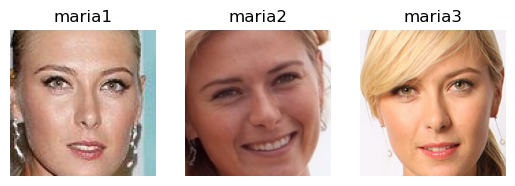

In [128]:
for person in files:
    for i in range(3):
        img_path = files[person][i]
        if(not os.path.exists(img_path)): continue
        img_path = files[person][i]
        img = cv2.imread(img_path)  
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        
        plt.subplot(1, 3, i+1)  
        plt.imshow(img)
        plt.title(f"{person}{i+1}")
        plt.axis("off")

    plt.show()

In [130]:
import pywt

def transform_image(img,mode = 'haar',level = 1):
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    gray = np.float64(gray)
    gray/=255
    coeffs =pywt.wavedec2(gray,mode,level = level)
    coeffs_H = list(coeffs)
    coeffs_H[0] *=0
    gray_H = pywt.waverec2(coeffs_H,mode)
    gray_H*=255
    gray_H = np.uint8(gray_H)
    return gray_H

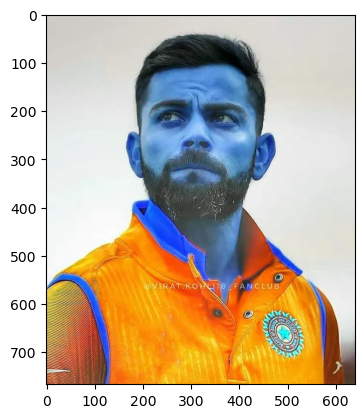

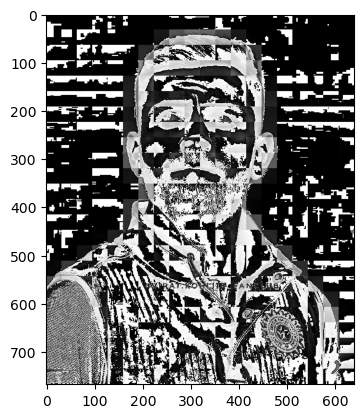

In [132]:
img = cv2.imread('kohli.jpg')
img_H = transform_image(img,'db1',5)
plt.imshow(img)
plt.show()
plt.imshow(img_H,cmap = 'gray')

In [140]:
x = []
y = []
celeb_index={
    'kohli':0,
    'maria':1,
    'serena':2,
    'roger':3,
    'messi':4
}

for person in files:
    for img_path in files[person]:
        img = cv2.imread(img_path)
        proper_img = cv2.resize(img,(32,32))
        img_H = transform_image(img)
        proper_img_H = cv2.resize(img_H,(32,32))
        combined_data_element = np.vstack((proper_img.reshape(32*32*3,1),proper_img_H.reshape(32*32,1)))
        x.append(combined_data_element)
        y.append(celeb_index[person])

In [144]:
len(x)

160

In [146]:
len(x[0])

4096

In [150]:
32*32*3+32*32

4096

In [152]:
x = np.array(x).reshape(len(x),4096).astype(float)  # we need to make it into 2d array
x.shape

(160, 4096)

In [154]:
x[0]

array([254., 185., 165., ...,   0.,   3., 252.])

In [234]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
pipe = Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel = 'rbf',C = 10))])
pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)



0.875

In [236]:
len(x_test)

32

In [238]:
print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       0.83      0.83      0.83         6
           2       1.00      1.00      1.00         4
           3       1.00      0.75      0.86         4
           4       0.86      0.75      0.80         8

    accuracy                           0.88        32
   macro avg       0.90      0.87      0.88        32
weighted avg       0.88      0.88      0.87        32



In [252]:
# we use gridsearch cv for the better model selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



group = {
    'SVC':{
        'model': SVC(gamma = 'auto'),
        'params':{
            'model__kernel':['rbf','linear'],
            'model__C':[1,10,50,100]
        }
    },
    'LogisticRegression':{
        'model':LogisticRegression(solver = 'liblinear'),
        'params':{
            'model__C':[1,5,10]
        }
    },
    'RandomForest':{
        'model':RandomForestClassifier(),
        'params':{
            'model__n_estimators':[1,5,10]
        }
    }
}

In [254]:
from sklearn.model_selection import GridSearchCV

scores = []
best_estimators = {}
for obj in group:
    obj_el = group[obj]
    pipe = Pipeline([('scaler',StandardScaler()),('model',obj_el['model'])])
    clf = GridSearchCV(pipe,obj_el['params'],cv = 5,return_train_score = False)
    clf.fit(x_train,y_train)
    scores.append({
        'model': obj,
        'best_score': clf.best_score_,
        'params':clf.best_params_,
    })
    best_estimators[obj] = clf.best_estimator_

df = pd.DataFrame(scores,columns = ['model','best_score','params'])
df

,model,best_score,params
0,SVC,0.858769,"{'model__C': 1, 'model__kernel': 'linear'}"
1,LogisticRegression,0.890154,{'model__C': 5}
2,RandomForest,0.696308,{'model__n_estimators': 10}


In [255]:
best_estimators

{'SVC': Pipeline(steps=[('scaler', StandardScaler()),
                 ('model', SVC(C=1, gamma='auto', kernel='linear'))]),
 'LogisticRegression': Pipeline(steps=[('scaler', StandardScaler()),
                 ('model', LogisticRegression(C=5, solver='liblinear'))]),
 'RandomForest': Pipeline(steps=[('scaler', StandardScaler()),
                 ('model', RandomForestClassifier(n_estimators=10))])}

In [256]:
best_estimators['SVC'].score(x_test,y_test)

0.90625

In [257]:
best_estimators['LogisticRegression'].score(x_test,y_test)

0.9375

In [258]:
best_estimators['RandomForest'].score(x_test,y_test)

0.8125

In [266]:
# so logistic regression is the best model for our dataset
final_model = best_estimators['LogisticRegression']
final_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(C=5, solver='liblinear'))])

In [268]:
y_pred = final_model.predict(x_test)
y_pred

array([2, 2, 1, 3, 1, 0, 4, 3, 4, 1, 0, 4, 0, 3, 0, 0, 3, 1, 4, 0, 4, 0,
       0, 0, 0, 1, 4, 3, 1, 2, 1, 4])

Text(95.72222222222221, 0.5, '[2 2 1 3 1 0 4 3 4 1 0 4 0 3 0 0 3 1 4 0 4 0 0 0 0 1 4 3 1 2 1 4]')

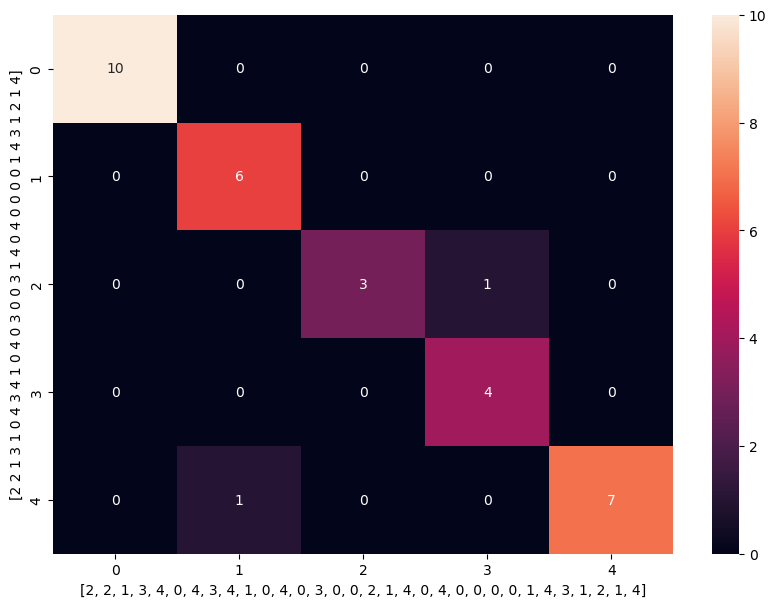

In [274]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True)
plt.xlabel(y_test)
plt.ylabel(y_pred)

In [276]:
# just only 2 mistakes
!pip install joblib

In [278]:
import joblib
joblib.dump(final_model,'final_model.pkl')

['final_model.pkl']

In [280]:
import json 



with open ('celeb_index.json','w') as f:
    f.write(json.dumps(celeb_index))